<a href="https://colab.research.google.com/github/Shakera-M-Hanif/ML/blob/main/shak_student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import missingno    # what is use for
%matplotlib inline
import numpy as np
import plotly.express as px


In [ ]:
raw_dataset=pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
raw_dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
dataset=raw_dataset.copy()

In [ ]:
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


what does object datatype mean?

In [ ]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


MISSING VALUES AND DUPLICATE ENTRIES


**CODE FOR MISSING ENTRIES CHART**

In [ ]:
if dataset.isnull().any(axis=None):
  print("\n preview of data with null values:\nxxxxxxxxxx")
  print(dataset[dataset.isnull().any(axis=1)].head(3))
  missingno.matrix(dataset)
  plt.show()

CODE FOR FINDING DUPLICATE ENTRIES

In [ ]:
if len(dataset[dataset.duplicated()])> 0:
  print ("no. of duplicated entries:", len(dataset[dataset.duplicated()]))
  print (dataset[dataset.duplicated (keep=False)].sort_values(by=list(dataset.columns)).head())
else:
    print("no duplicate entries found")

no duplicate entries found


what to do if there are duplicate entries?
dataset.drop_duplicates(inplace=True)

In [ ]:
df=dataset.copy()

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df_one=pd.get_dummies(df["test preparation course"])

In [ ]:
df_one

,completed,none
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
995,1,0
996,0,1
997,1,0
998,1,0


In [ ]:
df_two=pd.concat((df_one,df),axis=1)

In [ ]:
df_two

,completed,none,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,female,group B,bachelor's degree,standard,none,72,72,74
1,1,0,female,group C,some college,standard,completed,69,90,88
2,0,1,female,group B,master's degree,standard,none,90,95,93
3,0,1,male,group A,associate's degree,free/reduced,none,47,57,44
4,0,1,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...,...
995,1,0,female,group E,master's degree,standard,completed,88,99,95
996,0,1,male,group C,high school,free/reduced,none,62,55,55
997,1,0,female,group C,high school,free/reduced,completed,59,71,65
998,1,0,female,group D,some college,standard,completed,68,78,77


In [ ]:
df_two

,completed,none,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,female,group B,bachelor's degree,standard,none,72,72,74
1,1,0,female,group C,some college,standard,completed,69,90,88
2,0,1,female,group B,master's degree,standard,none,90,95,93
3,0,1,male,group A,associate's degree,free/reduced,none,47,57,44
4,0,1,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...,...
995,1,0,female,group E,master's degree,standard,completed,88,99,95
996,0,1,male,group C,high school,free/reduced,none,62,55,55
997,1,0,female,group C,high school,free/reduced,completed,59,71,65
998,1,0,female,group D,some college,standard,completed,68,78,77


In [ ]:
df_two=df_two.drop([],axis=1)
df_two

,completed,none,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,female,group B,bachelor's degree,standard,none,72,72,74
1,1,0,female,group C,some college,standard,completed,69,90,88
2,0,1,female,group B,master's degree,standard,none,90,95,93
3,0,1,male,group A,associate's degree,free/reduced,none,47,57,44
4,0,1,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...,...
995,1,0,female,group E,master's degree,standard,completed,88,99,95
996,0,1,male,group C,high school,free/reduced,none,62,55,55
997,1,0,female,group C,high school,free/reduced,completed,59,71,65
998,1,0,female,group D,some college,standard,completed,68,78,77


run from start it will work 

In [ ]:
df_two


,completed,none,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,female,group B,bachelor's degree,standard,none,72,72,74
1,1,0,female,group C,some college,standard,completed,69,90,88
2,0,1,female,group B,master's degree,standard,none,90,95,93
3,0,1,male,group A,associate's degree,free/reduced,none,47,57,44
4,0,1,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...,...
995,1,0,female,group E,master's degree,standard,completed,88,99,95
996,0,1,male,group C,high school,free/reduced,none,62,55,55
997,1,0,female,group C,high school,free/reduced,completed,59,71,65
998,1,0,female,group D,some college,standard,completed,68,78,77


In [ ]:
result=df_two.rename(columns={"completed":"test preparation course"})

In [ ]:
print (result)

     test preparation course  none  ... reading score writing score
0                          0     1  ...            72            74
1                          1     0  ...            90            88
2                          0     1  ...            95            93
3                          0     1  ...            57            44
4                          0     1  ...            78            75
..                       ...   ...  ...           ...           ...
995                        1     0  ...            99            95
996                        0     1  ...            55            55
997                        1     0  ...            71            65
998                        1     0  ...            78            77
999                        0     1  ...            86            86

[1000 rows x 10 columns]


categorical Data EDA

Here the column 'test preparation course' indicates whether a course is taken (completed[1]) or not (none[0]). 


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   test preparation course      1000 non-null   uint8 
 1   none                         1000 non-null   uint8 
 2   gender                       1000 non-null   object
 3   race/ethnicity               1000 non-null   object
 4   parental level of education  1000 non-null   object
 5   lunch                        1000 non-null   object
 6   test preparation course      1000 non-null   object
 7   math score                   1000 non-null   int64 
 8   reading score                1000 non-null   int64 
 9   writing score                1000 non-null   int64 
dtypes: int64(3), object(5), uint8(2)
memory usage: 64.6+ KB


In [ ]:
result

,test preparation course,none,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,female,group B,bachelor's degree,standard,none,72,72,74
1,1,0,female,group C,some college,standard,completed,69,90,88
2,0,1,female,group B,master's degree,standard,none,90,95,93
3,0,1,male,group A,associate's degree,free/reduced,none,47,57,44
4,0,1,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...,...
995,1,0,female,group E,master's degree,standard,completed,88,99,95
996,0,1,male,group C,high school,free/reduced,none,62,55,55
997,1,0,female,group C,high school,free/reduced,completed,59,71,65
998,1,0,female,group D,some college,standard,completed,68,78,77


In [ ]:
test_preparation_course_df=result['test preparation course']
test_preparation_course_df

,test preparation course,test preparation course
0,0,none
1,1,completed
2,0,none
3,0,none
4,0,none
...,...,...
995,1,completed
996,0,none
997,1,completed
998,1,completed


In [ ]:
tp=test_preparation_course_df.drop(test_preparation_course_df.columns[[1]],axis=1)
tp

""
0
1
2
3
4
...
995
996
997
998


In [ ]:
type(tp)

pandas.core.frame.DataFrame

Running a count on the 'test preperation course' indicates that most of the students haven't taken any test preparation coures.

In [ ]:
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
studentsPerformTable=dataset
studentsPerformTable

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


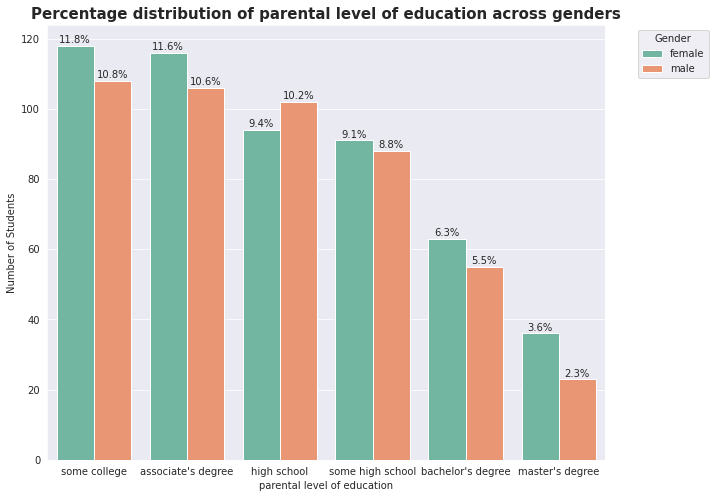

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.despine(offset=10, trim=True)
plt.tight_layout()
total = studentsPerformTable['parental level of education'].value_counts().sum()
ax = sns.countplot(x="parental level of education", hue='gender',data=studentsPerformTable,palette="Set2",
                  order = studentsPerformTable['parental level of education'].value_counts().index)
ax.set(xlabel='parental level of education', ylabel='Number of Students')
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=10,title = 'Gender')
plt.title('Percentage distribution of parental level of education across genders',fontweight="bold",fontsize = 15)    
plt.show()


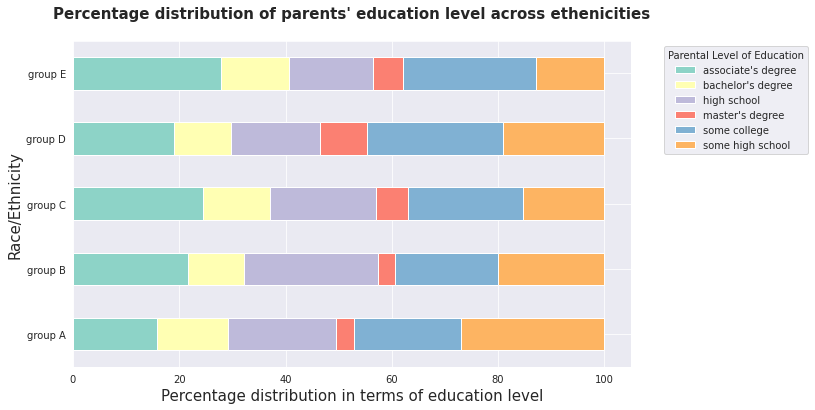

In [ ]:
sns.set_palette("Set3")
raceToEduLeveldf = studentsPerformTable.groupby(['race/ethnicity','parental level of education']).size().unstack().apply(lambda r: r/r.sum()*100, axis=1)
ax = raceToEduLeveldf.plot(kind='barh', stacked=True, figsize=(10, 6))
ax.set_ylabel('Race/Ethnicity',fontsize=15)
ax.set_xlabel('Percentage distribution in terms of education level',fontsize=15)
plt.legend(title='Parental Level of Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Percentage distribution of parents' education level across ethenicities",fontweight="bold",fontsize = 15,y=1.05)
plt.show()

In [ ]:
x=df["parental level of education"].value_counts().reset_index()
px.pie(x,names="index",values="parental level of education")

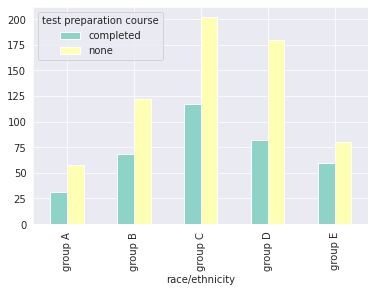

In [ ]:
pd.crosstab(df["race/ethnicity"],df["test preparation course"]).plot(kind="bar")
plt.show()

In [ ]:
gen=df.gender.value_counts().reset_index()
gen
px.pie(gen,names="index",values="gender")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



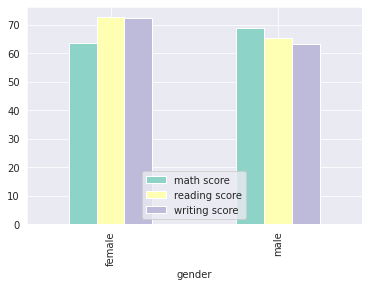

In [ ]:
df.groupby(by=["gender"])["math score","reading score","writing score"].mean().plot(kind="bar")
plt.show()

In [ ]:
# number of students who passed in math
dataset['maths_passed']=dataset['math score'].apply(lambda x :'P' if x>40 else 'F')
dataset['maths_passed'].value_counts()

P    950
F     50
Name: maths_passed, dtype: int64

In [ ]:
#number of students who passed in reading
dataset['reading_passed'] = dataset['reading score'].apply(lambda x: 'P' if x>40 else 'F')
dataset['reading_passed'].value_counts()

P    973
F     27
Name: reading_passed, dtype: int64

In [ ]:
# Number of students who passed in writing.
dataset['writing_passed']=dataset['writing score'].apply(lambda x: 'P' if x>40 else 'F')
dataset['writing_passed'].value_counts()

P    965
F     35
Name: writing_passed, dtype: int64

Text(0.5, 1.0, 'Students who passed in writing')

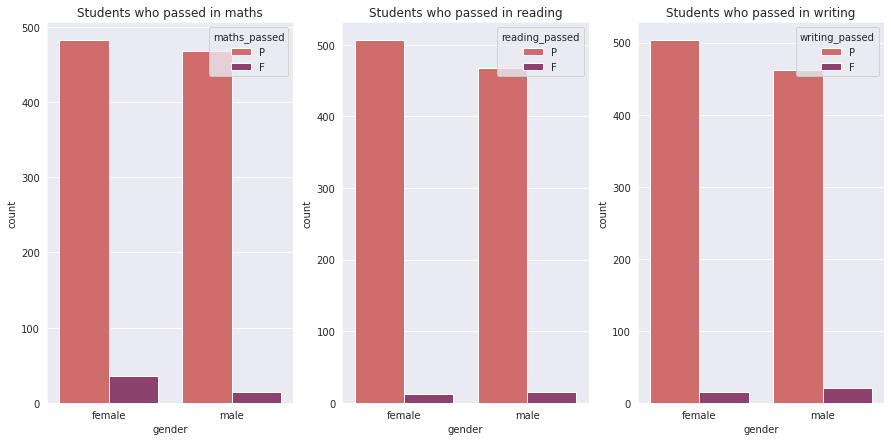

In [ ]:
# subject with the most number of failures
sns.color_palette("flare", as_cmap=True)
#sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
#sns.color_palette("light:#5A9", as_cmap=True)
plt.subplots(1,3,figsize=(15,7))
plt.subplot(1,3,1)
sns.countplot(x='gender',data=dataset,hue='maths_passed',palette="flare")
plt.title('Students who passed in maths')
plt.subplot(1,3,2)
sns.countplot(x='gender',data=dataset,hue='reading_passed',palette="flare")
plt.title('Students who passed in reading')
plt.subplot(1,3,3)
sns.countplot(x='gender',data=dataset,hue='writing_passed',palette="flare")
plt.title('Students who passed in writing')